Exhibits a typical use case for the initialisation, preview, and quick visualisation tools.

In [1]:
import sys
sys.path.append('..')

In [2]:
import planetengine
import modelscripts

In [3]:
initial1 = {
    'temperatureField': {'IC': planetengine.initials.sinusoidal.IC()},
    'materialVar': {'IC': planetengine.initials.extents.IC(([1], planetengine.shapes.trapezoid()))}
    }

In [4]:
model1 = planetengine.frame.make_frame(
    modelscripts.MS98X_systemscript.build(res = 16, f = 1., aspect = 2., tau = 1e5),
    modelscripts.MS98X_observerscript.build(),
    initial1
    )

Making a new frame...
Making stamps...
Stamps made.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation complete!
Frame built!
Frame made.


In [5]:
initial2 = {
    'temperatureField': {
        'IC': planetengine.initials.load.IC(model1, 'temperatureField'),
        'varScales': [[0.12, 1.12]],
        'varBounds': [[0.12, 1.12, '.', '.']]
        },
    'materialVar': {'IC': planetengine.initials.extents.IC(([1], planetengine.shapes.trapezoid()))}
    }

Loading checkpoint...
Already at step 0: aborting load_checkpoint.


Attaching...
Done!
Attaching...
Done!
Fitted 1 variables to the figure.



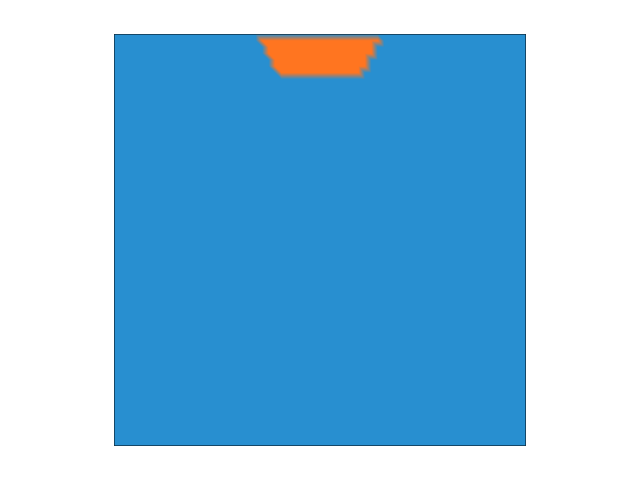

In [6]:
planetengine.initials.preview(initial2['materialVar']['IC'])

Attaching...
Done!
Attaching...
Done!
Attaching...
Done!
Mapping achieved at tolerance =
1e-05
Attaching...
Done!
Fitted 1 variables to the figure.



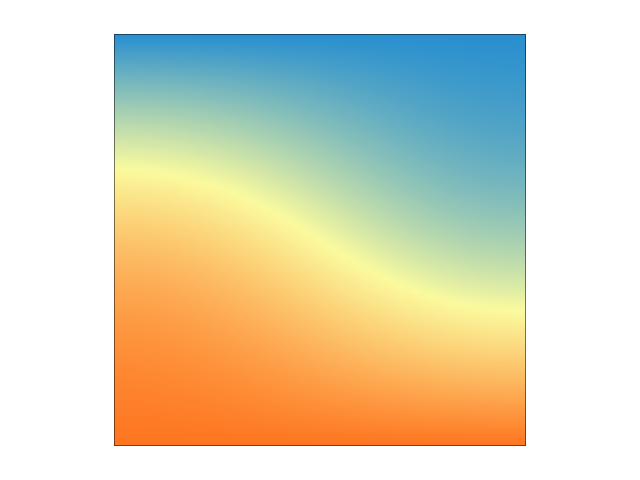

In [7]:
planetengine.initials.preview(initial2['temperatureField']['IC'])

In [8]:
model2 = planetengine.frame.make_frame(
    modelscripts.MS98X_systemscript.build(res = 16, f = 0.5, tau = 1e4),
    modelscripts.MS98X_observerscript.build(),
    initial2
    )

Making a new frame...
Making stamps...
Stamps made.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialising...
Attaching...
Done!
Attaching...
Done!
Mapping achieved at tolerance =
0.0
Attaching...
Done!
Initialisation complete!
Frame built!
Frame made.


In [9]:
from underworld import function as fn

In [10]:
system = model2.system

In [11]:
isYieldingFn = fn.branching.conditional([
    (system.creepViscFn > system.plasticViscFn, 1),
    (True, 0)
    ])

In [12]:
obsVars = [
    system.temperatureField,
    system.velocityField,
    system.mesh,
    system.viscosityFn,
    system.materialVar,
    isYieldingFn
    ]

Attaching...
Done!
Attaching...
Done!
Attaching...
Done!
Attaching...
Done!
Attaching...
Done!
Fitted 5 variables to the figure.



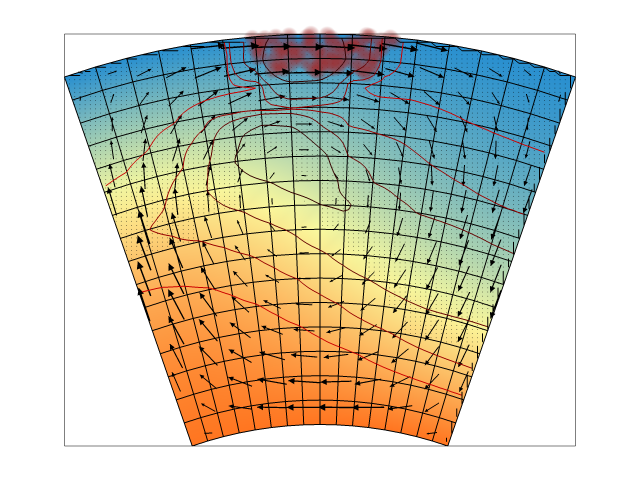

In [13]:
planetengine.quickShow(*obsVars)

In [14]:
%%sh

rm -rf pemod*